Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time
import matplotlib.pyplot as plt
import pickle

Start time

In [ ]:
# Start total execution time
start_time = time.time()

Data Collection and Analysis

In [ ]:
# Loading the dataset
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

# Data preprocessing
diabetes_dataset.drop(columns='gender', inplace=True)
diabetes_dataset['smoking_history'] = diabetes_dataset['smoking_history'].map({
    'never': 0,
    'No Info': 1,
    'former': 2,
    'current': 3
})
diabetes_dataset.dropna(inplace=True)

In [ ]:
# Separating features and labels
X = diabetes_dataset.drop(columns='diabetes', axis=1)
Y = diabetes_dataset['diabetes']

Train Test Split

In [ ]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

Training the Model

In [ ]:
# Training the Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=2)
classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=2)

Model Evaluation

In [ ]:
# Model evaluation
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

Accuracy Score

In [ ]:
# Print accuracy scores
print(f'Accuracy score of the training data: {training_data_accuracy * 100:.2f}%')
print(f'Accuracy score of the test data: {test_data_accuracy * 100:.2f}%')

Accuracy score of the training data: 99.85%
Accuracy score of the test data: 96.78%


End Time

In [ ]:
# End total execution time
end_time = time.time()
execution_time = end_time - start_time
print(f"Total execution time: {execution_time:.4f} seconds")

Total execution time: 7.0845 seconds


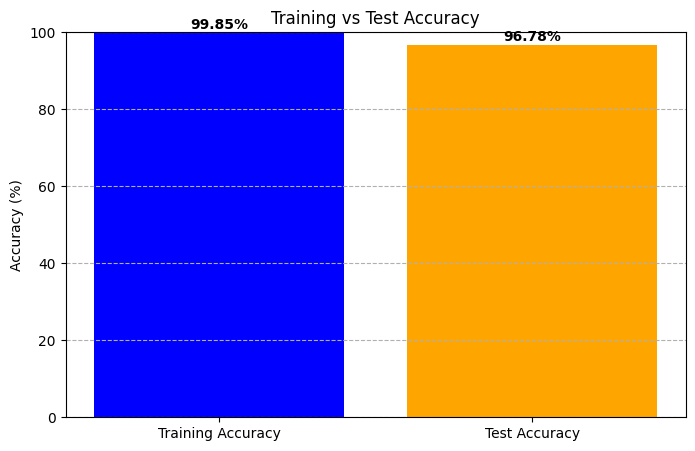

In [ ]:
# Plotting accuracies (optional)
accuracies = [training_data_accuracy * 100, test_data_accuracy * 100]
labels = ['Training Accuracy', 'Test Accuracy']

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Training vs Test Accuracy')
plt.grid(axis='y', linestyle='--')

for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')

plt.show()

Making a predictive system

In [ ]:
# Making a predictive system
input_data = (80, 0, 1, 0, 25.19, 6.6, 140)
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)

# Prediction
prediction = classifier.predict(input_data_as_numpy_array)
if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

The person is not diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


For Saving the Model

In [ ]:
# Saving the trained Random Forest model
filename = 'diabetes_rf_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

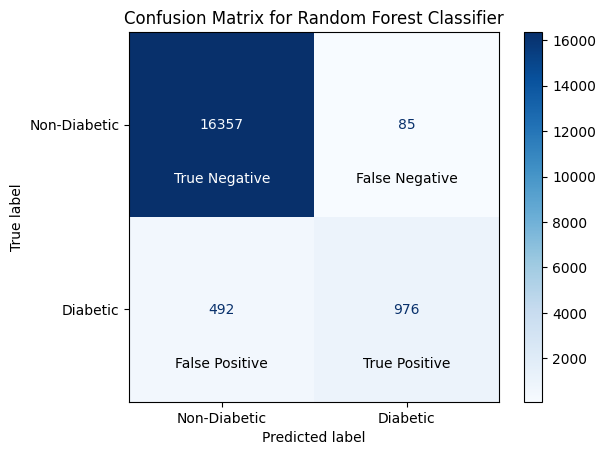

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix for the test data
cm = confusion_matrix(Y_test, X_test_prediction)

# Display the confusion matrix using sklearn's built-in display function
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Diabetic', 'Diabetic'])

# Plot with modifications
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier')

# Add labels for all components below the numbers
plt.text(0, 0.25, '\nTrue Negative', ha='center', va='center', color='white')
plt.text(1, 1.25, '\nTrue Positive', ha='center', va='center', color='black')
plt.text(0, 1.25, '\nFalse Positive', ha='center', va='center', color='black')
plt.text(1, 0.25, '\nFalse Negative', ha='center', va='center', color='black')

plt.show()
